In [1]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #library to visualize missing data
import re#library for regular expression
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,RobustScaler,LabelEncoder,OneHotEncoder 
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
#Function to read data to dataframe

def read_file_to_df(filepath):
    
    df = pd.DataFrame()#define an empty dataframe
    
    try:
        if filepath.endswith(".csv"):
            df = pd.read_csv(filepath)
            df_loaded_ind=True

        elif (filepath.endswith(".xls") | filepath.endswith(".xlsx")):
            df = pd.read_excel(filepath)
            df_loaded_ind=True

        else:
            print('Invalid file type')
            print('\n')
            df_loaded_ind = False
    except:
        print('Invalid file path')
        print('\n')
        df_loaded_ind = False
        
                
    return df_loaded_ind,df

In [3]:

while(True):
    filepath             = input('Please provide the file path for the data : ')
    print('\n')
    data_loaded_ind,data = read_file_to_df(filepath)
    if data_loaded_ind:
        print('Data is successfully loaded!!')
        break
    else:
        print('Error loading dataset!! Try again...')
    print('\n')


Please provide the file path for the data : Retail Fraud Detection.xlsx


Data is successfully loaded!!


In [4]:
print('Take a quick look at your data...\n')
data.head()


Take a quick look at your data...



,Transaction_Id,Invoice_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Loyalty_Id,Gender,Age,Membership_Id,Membership_Type,...,First Time Customers.,Bigger than Average Orders.,Fast Shipping,Unusual Location.,Large quantity of Same Product .,Multiple Shipping Addresses.,Shipping and Billing Address are not the same.,Several Cards used from the Same Ip Address.,Payment Information typed with Capital letters.,Many Transactions in a short time period.
0,234825,88371,88371,76565900,954421840,LID876561,FEMALE,26,904.0,Platinum,...,No,No,No,No,No,No,No,No,No,No
1,235265,88578,88578,76565900,972532386,NaN,FEMALE,39,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
2,235093,88407,88407,76565900,998665296,NaN,MALE,21,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
3,234666,88234,88234,76566122,965982087,NaN,MALE,22,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
4,234823,88153,88153,76565906,953091566,LID876543,MALE,19,904.0,Platinum,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No


In [5]:
before_dup_row = data.shape[0]
print("Checking for duplicate rows in the data and dropping if any...")
print("\n")
data.drop_duplicates(inplace=True)
after_dup_row = data.shape[0]
dropped_row_count=(before_dup_row - after_dup_row)
if dropped_row_count > 0:
    print("{} duplicate rows were dropped...".format(dropped_row_count))
else:
    print("No duplicate entries found!")

Checking for duplicate rows in the data and dropping if any...


No duplicate entries found!


In [6]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            iv = vs.iloc[:,i].tolist()
            for j in range(i+1, lcs):
                jv = vs.iloc[:,j].tolist()
                if iv == jv:
                    dups.append((cs[i],cs[j]))
                    break

    return dups

In [7]:
print("Checking for duplicate columns in the data and dropping if any..")
print('\n')
dup_cols_pair=duplicate_columns(data)
if dup_cols_pair:
    print("Here is the list of duplicate columns pair : ",dup_cols_pair)
    print('\n')
    print("Dropping first column of all duplicate columns pairs..")
    print('\n')
    dup_col_drop=list(set([i[0] for i in dup_cols_pair]))
    data.drop(dup_col_drop,axis=1,inplace=True)
    print("Here is the list of columns that were dropped : ",dup_col_drop)
    print("\n")
    print("Remaining columns in the dataset are : ",data.columns.tolist())
else:
    print("No duplicate columns found!")


Checking for duplicate columns in the data and dropping if any..


Here is the list of duplicate columns pair :  [('Invoice_Id', 'Order_Id'), ('PLACE_OF_BITRH', 'Residence_City'), ('Residence_City', 'Office_City'), ('Residence_Province', 'OFFICE_PROVIENCE'), ('Residence_Country', 'OFFICE_COUNTRY'), ('Residence_phone', 'residence_fax_number'), ('Office_City', 'PLACE_OF_BIRTH'), ('OFFICE_COUNTRY', 'COUNTRY_OF_BIRTH_SC'), ('OFFICE_PHONE_NO', 'office_fax_number'), ('Preferred_Comm_Channel', 'Acquistion_Channel_Description'), ('Preferred_Comm_Sub_Channel', 'acquisition_subchannel'), ('Preferred_Comm_Sub_Channel_SC', 'acquisition_subchannel_type_sc'), ('EVER_BANKRUPT_FLG', 'BLACKLISTED_FLG')]


Dropping first column of all duplicate columns pairs..


Here is the list of columns that were dropped :  ['PLACE_OF_BITRH', 'OFFICE_COUNTRY', 'EVER_BANKRUPT_FLG', 'Residence_phone', 'Residence_Province', 'Preferred_Comm_Channel', 'Residence_Country', 'Office_City', 'Preferred_Comm_Sub_Channel_SC', 'R

In [8]:
print('The data types of every feature are as follows:\n')

g = data.columns.to_series().groupby(data.dtypes).groups
{k.name: v for k, v in g.items()}


The data types of every feature are as follows:



{'int64': Index(['Transaction_Id', 'Order_Id', 'Customer_Id', 'Mdm_Customer_Id', 'Age',
        'Product_Id', 'Channel_Id', 'Sub_Channel_Id', 'Gender_Age_Id',
        'Size_Id', 'Color_Id', 'Campaign_Id', 'Store_Id', 'City_Id',
        'Country_Id', 'Business_Week', 'Day', 'No_Of_Items',
        'Order_Item_Paidprice_Gross_Amt_', 'Order_Item_Listprice_Gross_Amt_',
        'Discount_Percentage', 'Quantity_Returned', 'No_Of_Items_After_Return',
        'Cancel_Reason_Code', 'Return_Amt', 'Order_Returnpaid_Gross_Amt', 'AGE',
        'age_at_joining', 'fbck_following_CNT', 'fbck_follower_CNT',
        'twt_follower_CNT', 'twt_following_CNT', 'Friends_Count',
        'credit_risk_score', 'BIRTH_YEAR', 'BIRTH_QUARTER',
        'NO_TIMES_DELINQUENT_in_365_days', 'NO_OF_DEPENDANTS'],
       dtype='object'),
 'float64': Index(['Membership_Id', 'Discount_Amt', 'MEMBERSHIP_TYPE__ID',
        'customer_type_id', 'GENDER_ID', 'CUSTOMER_STATUS_ID',
        'MARITAL_STATUS_ID', 'PROFESSION_TYPE_ID', 

Plotting the features with integer data types..


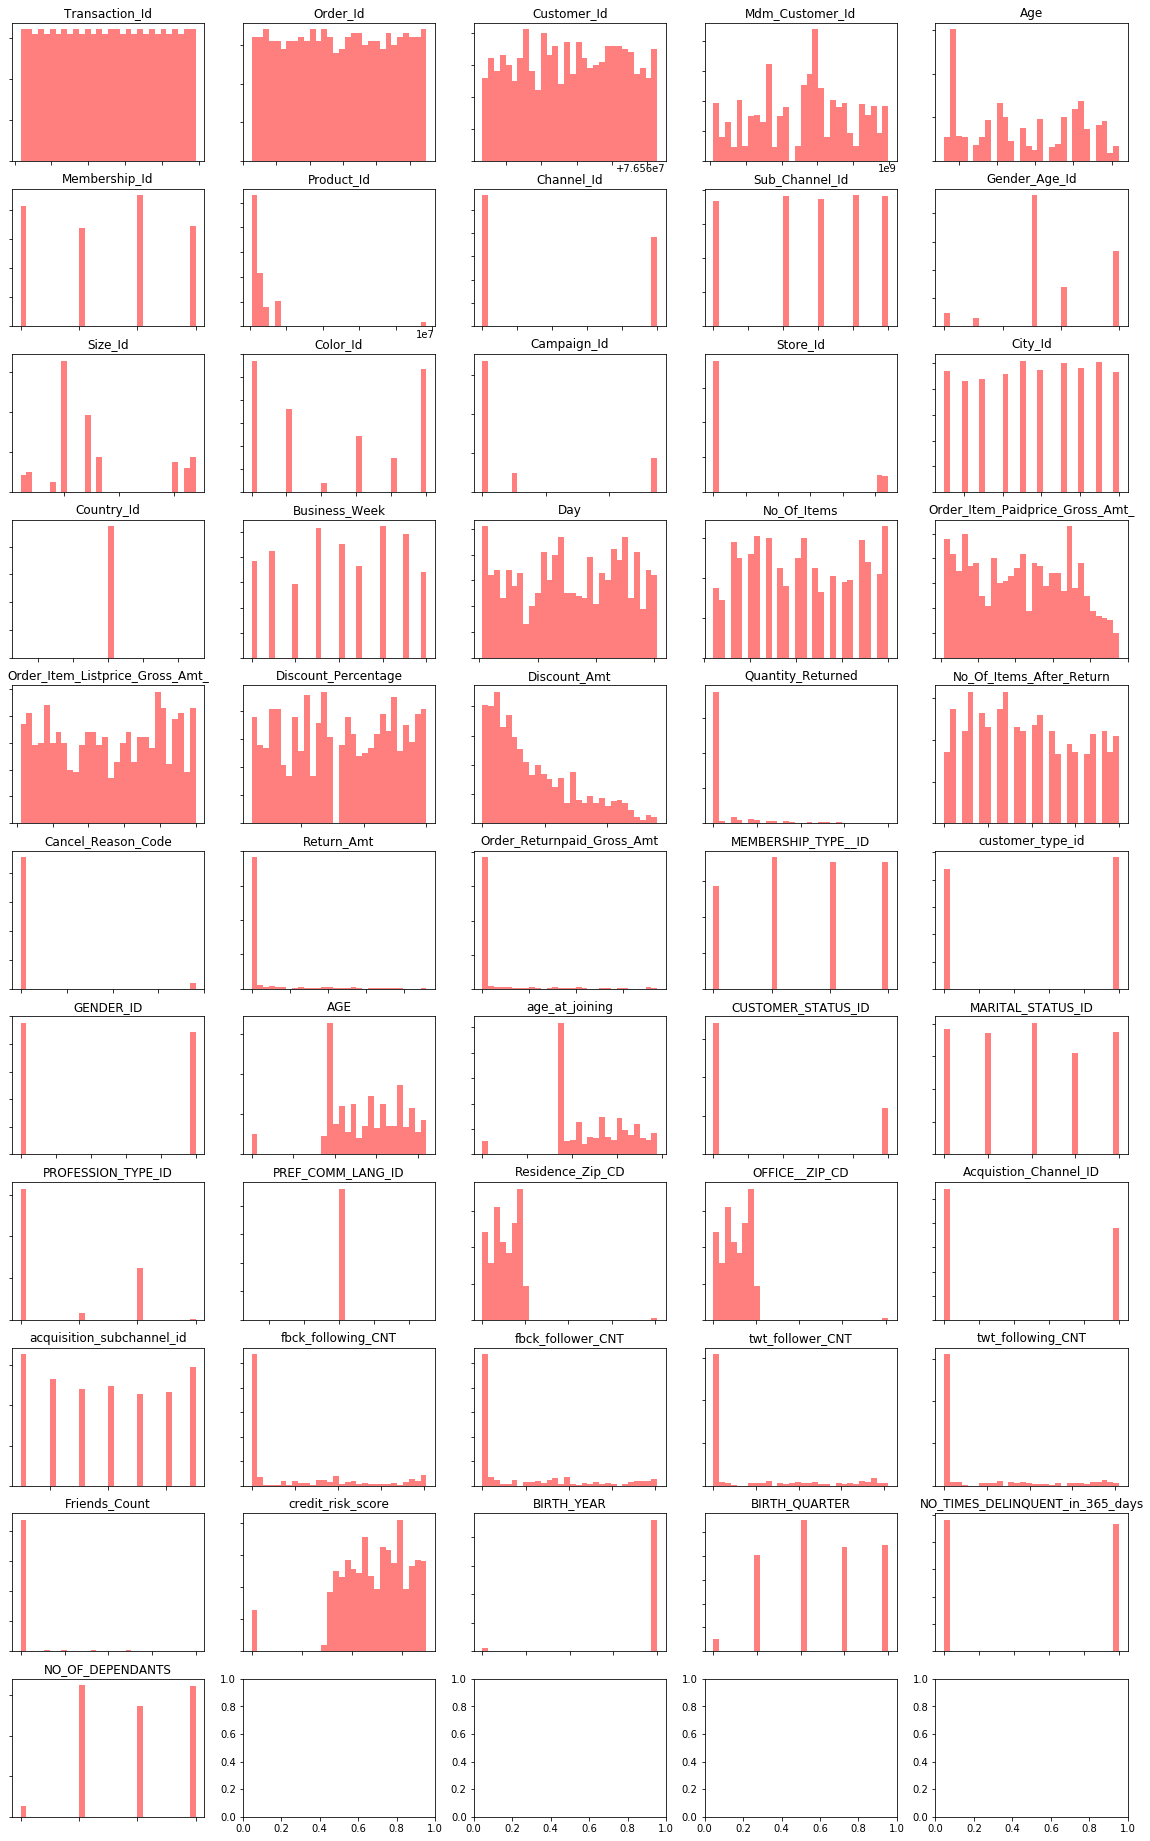

In [9]:
data_int = data.select_dtypes(include=['int64','int32','float64','float32'])
int_columns = data_int.columns.tolist()
print('Plotting the features with integer data types..')
no_cols = 5
no_rows = int(np.ceil(len(int_columns) / no_cols))
fig, axes = plt.subplots(ncols=no_cols,nrows=no_rows, figsize=(20,3*no_rows))
axes = axes.flatten()

for i in range(len(int_columns)):#(no_rows*no_cols):
    axes[i].hist(data_int[int_columns[i]].dropna(), bins=30,facecolor='r',alpha=0.5)
    axes[i].set_title(int_columns[i])
    plt.setp(axes[i].get_xticklabels(), visible=False)
    plt.setp(axes[i].get_yticklabels(), visible=False)


In [10]:
#Function to validate column names
def validate_columns(df,columnlist):
    
    invalid_columns = []
    if columnlist:
        invalid_columns = [col for col in columnlist if col not in df.columns.tolist()]
                
    return invalid_columns

In [11]:
#Function to convert datatype of mentioned columns to corresponding mentioned types
def data_type_converter(df,column_names=[],to_types=[]):
    
    if (isinstance(column_names, list) & isinstance(to_types, list)):#check if passed item is in list format

        for col,typ in zip(column_names,to_types):
            if typ == 'datetime64[ns]':
                try:
                    df[col] = df[col].astype(typ)
                except:
                    invalid_frmt=True
                    while(invalid_frmt==True):
                        print("Unable to convert {} to datetime format".format(col))
                        frmt=input('Please specify the format of {} feature'.format(col))
                        print("\n")
                        try:
                            input_taken=False
                            for i in range(len(df[col])):
                                if df[col][i].startswith('0000'):
                                    if (input_taken==False):
                                        print("Some of the values in {} starts with '0000' which is invalid!\n".format(col))
                                        rep_val=input("Please enter a date in the same format as {} to replace values that start with '0000'".format(col))
                                        input_taken=True
                                    df[col][i] = df[col][i].replace(df[col][i],rep_val)

                            df[col]=pd.to_datetime(data[col], format=frmt)
                            invalid_frmt=False
                        except Exception as e:
                            print(e)
                            #print("Oops!! Invalid format entered")
            else:
                df[col] = df[col].astype(typ)

    return df

In [12]:
print('Please make sure that all the features are in int/float/string/category/boolean/timestamp format')
print('\n')
print("Please note that accepted type for all date/timestamp feature conversion is : 'datetime64[ns]'\n")
print("Example for date format: If your date is '2018-07-02-16.07.13.624406',format should be '%Y-%m-%d-%H.%M.%S.%f'")
print('\n')
type_change_ind = (input('Would you like to change the data type of any feature?-Y/N')).upper()
print('\n')
if type_change_ind == 'Y':
    while(True):
        cols_for_type_change=[]
        to_type_list=[]
        print('Enter the features for which you wish to change the data types, separated by comma')
        cols_for_type_change = [x for x in input().split(',')]
        print('\n')
        invalid_col_names = validate_columns(data,columnlist = cols_for_type_change)
        if invalid_col_names:
            print('Warning!! Some of the feature names you have entered are incorrect. List of incorrectly entered features are : ',invalid_col_names)
            print('Please verify..')
            print('\n')
        else:
            before_data_type = data[cols_for_type_change].dtypes.tolist()
            break 
    print('Enter the type to which you would like to change the data types, in the same sequence as the features, separated by comma')
    to_type_list         = [x for x in input().split(',')]
    print('\n')
    data = data_type_converter(data,column_names=cols_for_type_change,to_types=to_type_list)
    after_data_type = data[cols_for_type_change].dtypes.tolist()
    print('The changed data types are as follows :\n') 
    display(pd.DataFrame(list(zip(cols_for_type_change, before_data_type, after_data_type)),columns=['Features','Before', 'After']))


Please make sure that all the features are in int/float/string/category/boolean/timestamp format


Please note that accepted type for all date/timestamp feature conversion is : 'datetime64[ns]'

Example for date format: If your date is '2018-07-02-16.07.13.624406',format should be '%Y-%m-%d-%H.%M.%S.%f'


Would you like to change the data type of any feature?-Y/Ny


Enter the features for which you wish to change the data types, separated by comma
Transaction_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Product_Id,Channel_Id,Sub_Channel_Id,Gender_Age_Id,Size_Id,Color_Id,Campaign_Id,Store_Id,City_Id,Country_Id,Business_Week,Day,Cancel_Reason_Code,BIRTH_YEAR,BIRTH_QUARTER,Membership_Id,MEMBERSHIP_TYPE__ID,customer_type_id,GENDER_ID,CUSTOMER_STATUS_ID,MARITAL_STATUS_ID,PROFESSION_TYPE_ID,PREF_COMM_LANG_ID,Residence_Zip_CD,OFFICE__ZIP_CD,Acquistion_Channel_ID,acquisition_subchannel_id,Sale_Dt,Lastmodified_Dt,BIRTH_DATE,CUSTOMER_CREATED_DT,ANNIVERSARY_DT


Enter the type to which you would like 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unable to convert CUSTOMER_CREATED_DT to datetime format
Please specify the format of CUSTOMER_CREATED_DT feature%Y-%m-%d


Some of the values in CUSTOMER_CREATED_DT starts with '0000' which is invalid!

Please enter a date in the same format as CUSTOMER_CREATED_DT to replace values that start with '0000'1678-01-01
Unable to convert ANNIVERSARY_DT to datetime format
Please specify the format of ANNIVERSARY_DT feature%Y-%m-%d


Some of the values in ANNIVERSARY_DT starts with '0000' which is invalid!

Please enter a date in the same format as ANNIVERSARY_DT to replace values that start with '0000'1678-01-01
The changed data types are as follows :



,Features,Before,After
0,Transaction_Id,int64,object
1,Order_Id,int64,object
2,Customer_Id,int64,object
3,Mdm_Customer_Id,int64,object
4,Product_Id,int64,object
5,Channel_Id,int64,object
6,Sub_Channel_Id,int64,object
7,Gender_Age_Id,int64,object
8,Size_Id,int64,object
9,Color_Id,int64,object


In [13]:
#Function to get the ratio of null values in columns of dataset in descending order
def get_null_count(df):
   
    na_count=df.isnull().sum().sort_values(ascending=False)/len(df)#columnwise ratio of null values
    na_count=na_count[na_count>0]#choose only the columns whic have null values

    return na_count
        

In [14]:
#Function to visualize the null value distribution
def visualize_null_count(df,null_count):

    filtered_data = msno.nullity_filter(df,  filter='bottom',n=len(null_count))
    msno.matrix(filtered_data,labels=True,figsize=(35, 15))
        



Checking for null values in the dataset...


Below are the features that contain null values :
 Cancel_Description                0.957761
Store_Short_Code                  0.796199
Store_Description                 0.796199
Campaign_Desc                     0.712777
Sales_Rep_Name                    0.594509
Interest_2                        0.515312
Interests_1                       0.514256
MEMBERSHIP_TYPE__ID               0.288279
MEMBERSHIP_TYPE                   0.288279
MEMBERSHIP_TYPE_SC                0.288279
Loyalty_Id                        0.181626
Membership_Id                     0.181626
Membership_Type                   0.181626
Membership_SC                     0.181626
Residence_Address_Line_3          0.051742
Residence_Address_Line_2          0.051742
Office_Address_Line_2             0.042239
Office_Address_Line_3             0.042239
twt_user_FLG                      0.030623
SALUTATION                        0.027455
INCOME_RANGE                      0.027455

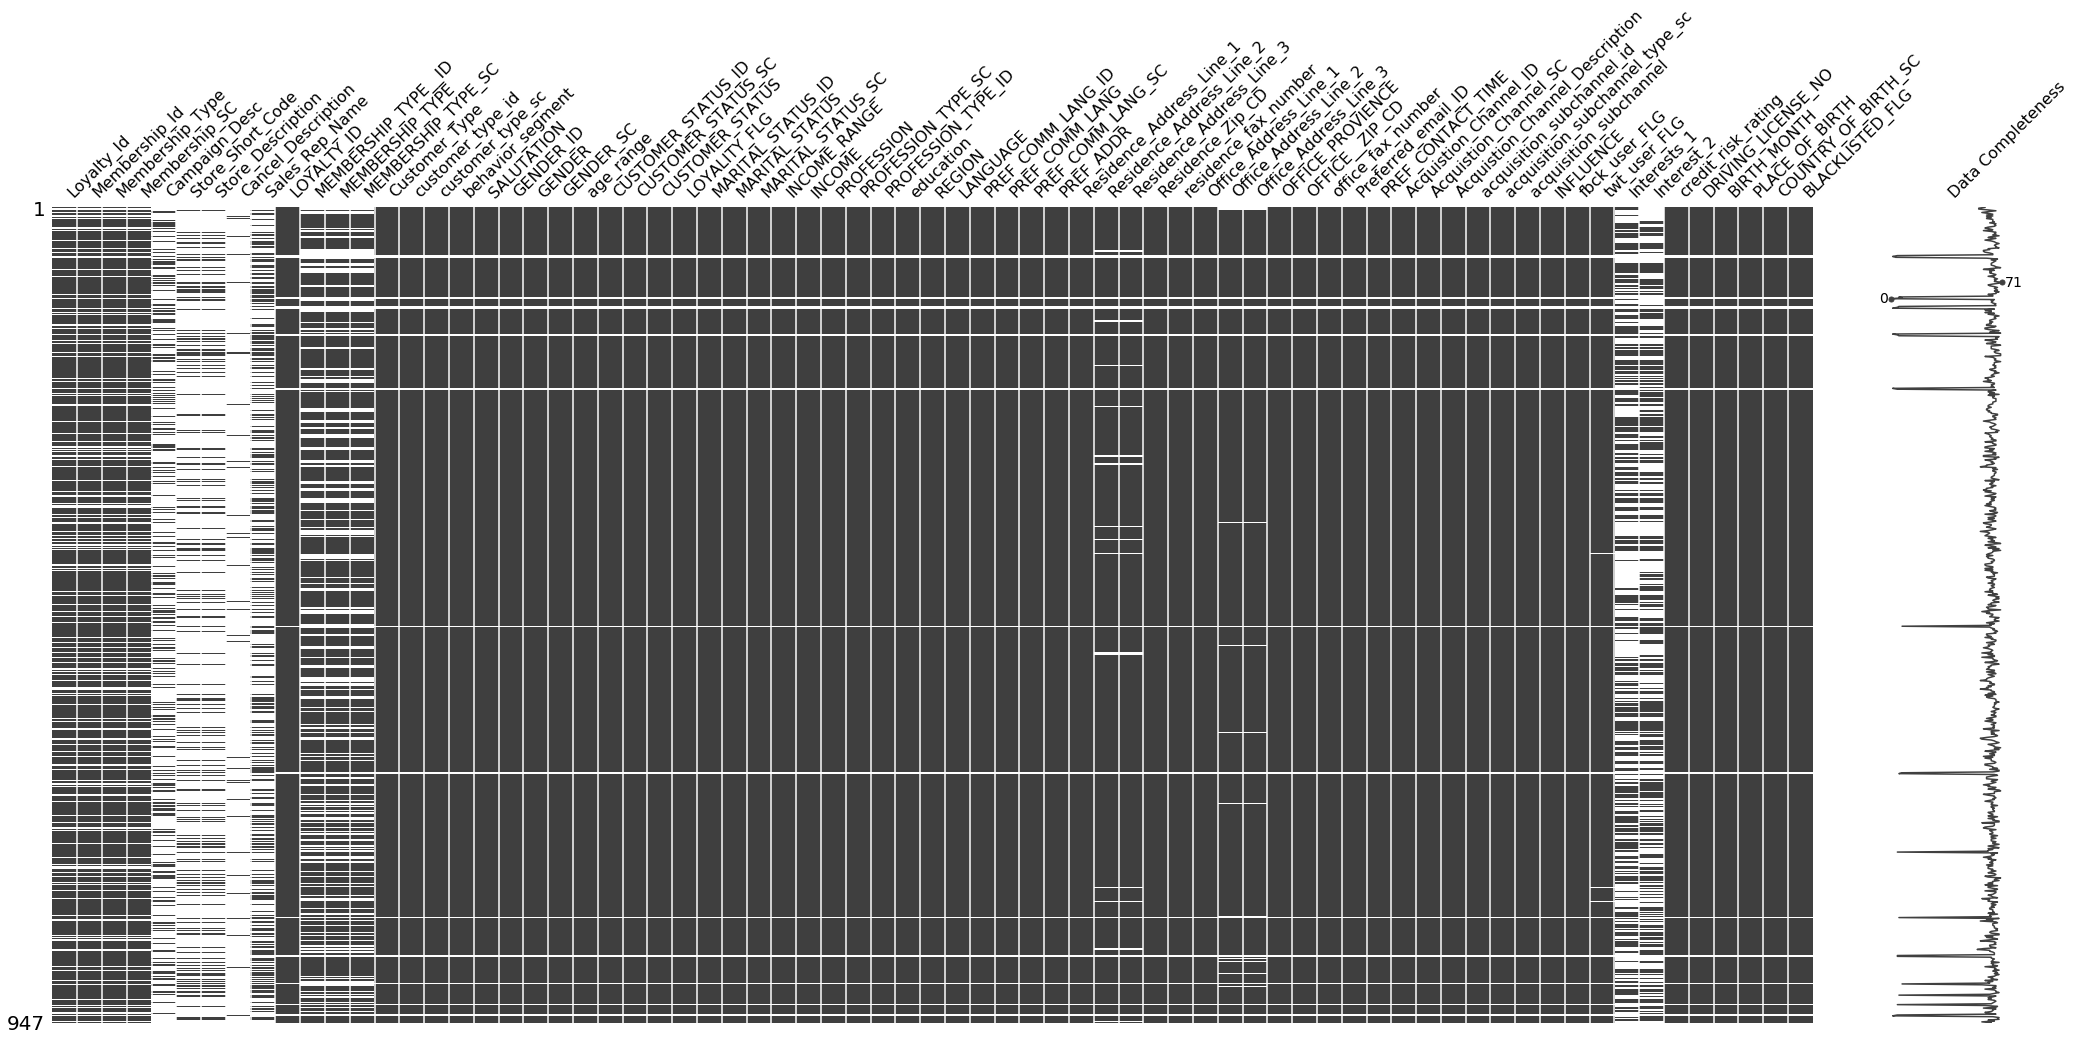

Press enter to continue


''

In [15]:
#input('Press enter to continue ...')
print('\n')
print('Checking for null values in the dataset...')
print('\n')
if data.isnull().values.any():
    null_count = get_null_count(data)
    print('Below are the features that contain null values :\n', null_count)
    visualize_null_count(data,null_count)
    plt.show()
else:
    print('There is not any null value in the dataset!!')

input('Press enter to continue')

In [16]:
#Function to drop desired columns
def drop_columns(df,columnlist=[]):
    if columnlist:
        df.drop(columnlist,axis=1,inplace=True)#Drop all the columns in the list
    return df

In [17]:

drop_col_ind = (input('Would you like to drop any feature?-Y/N')).upper()
print('\n')
if drop_col_ind == 'Y':
    while(True):
        drop_null_column_list = []
        print('Enter the features you wish to drop, separated by comma :')
        drop_null_column_list = [x for x in input().split(',')]
        print('\n')

        if drop_null_column_list:
            invalid_col_names = validate_columns(data,columnlist = drop_null_column_list)
            if invalid_col_names:
                print('Warning!! Some of the feature names you have entered are incorrect. List of incorrectly entered features are : ',invalid_col_names)
                print('Please verify..')
                print('\n')
            else:
                break 

    data = drop_columns(data,columnlist=drop_null_column_list)
    print('Specified features are successfully dropped...')
    print('\n')
    print('Existing features in the dataset are: ', data.columns.tolist())
    print('\n')
    input('Press enter to continue')

Would you like to drop any feature?-Y/Nn




In [18]:
#Function to impute missing values
def impute_missing(df, drop_nans):  

    #drop the rows containing null values if drop_nans is set to True
    if drop_nans:
        df.dropna(inplace=True)
    else:
        null_features = get_null_count(df).index.tolist()
        print("Here is the list of features containing null values : \n",null_features)
        print("\n")
        print("For each of these features, please specify how you would like to impute missing values,separated by commas in the same order as the above list\n")
        print("You can enter 'mean' to replace missing values with mean of the feature, 'mode' to replace with mode or 'others' to replace with desired value.\n")
        print("NOTE :\n")
    
        for i,j in zip(null_features,df[null_features].dtypes):
            print("Datatype of {} : {}".format(i,j))
        
        imputation = [x for x in input().split(',')]
        print("\n")
        print("Imputing missing values...")
        print("\n") 
        for col,imp in zip(null_features,imputation):
            if imp == 'mean':
                column_median = df[col].median()
                df[col].fillna(column_median, inplace=True)
            elif imp == 'mode':
                column_mode = df[col].mode()[0]
                df[col].fillna(column_mode, inplace=True)
            elif imp == 'others':
                prev_type=df[col].dtype
                print("For {} :".format(col))
                imp_oth = input(" Please specify the value to replace null values : ")
                print("\n") 
                df[col].fillna(imp_oth, inplace=True)
                after_type=df[col].dtype
                if (prev_type != after_type):
                    df[col] = df[col].astype(prev_type)
                    

                
    if df.isnull().values.any():
        print('Error in replacing/dropping missing data!!')
    else:
        if drop_nans:
            print('Missing values are successfully dropped!!')   
        else:
            print('Missing values are successfully replaced!!')
    
    return df
    

In [19]:
if data.isnull().values.any():
    drop_na_rows = (input('Do you wish to drop all rows with null values?-Y/N')).upper()
    print('\n')
    drop_nans = False
    if drop_na_rows == 'Y':
        drop_nans = True

    data = impute_missing(data, drop_nans=drop_nans)
    
    print('\n')
    input('Press enter to continue')


Do you wish to drop all rows with null values?-Y/Nn


Here is the list of features containing null values : 
 ['Cancel_Description', 'Store_Short_Code', 'Store_Description', 'Campaign_Desc', 'Sales_Rep_Name', 'Interest_2', 'Interests_1', 'MEMBERSHIP_TYPE__ID', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_TYPE_SC', 'Loyalty_Id', 'Membership_Id', 'Membership_Type', 'Membership_SC', 'Residence_Address_Line_3', 'Residence_Address_Line_2', 'Office_Address_Line_2', 'Office_Address_Line_3', 'twt_user_FLG', 'SALUTATION', 'INCOME_RANGE', 'Residence_Address_Line_1', 'PREF_COMM_LANG_SC', 'PREF_COMM_LANG', 'PREF_COMM_LANG_ID', 'LANGUAGE', 'REGION', 'education', 'PROFESSION_TYPE_ID', 'PROFESSION_TYPE_SC', 'PROFESSION', 'INCOME', 'LOYALTY_ID', 'GENDER_ID', 'MARITAL_STATUS_SC', 'MARITAL_STATUS', 'MARITAL_STATUS_ID', 'Customer_Type', 'customer_type_id', 'LOYALITY_FLG', 'customer_type_sc', 'behavior_segment', 'CUSTOMER_STATUS', 'CUSTOMER_STATUS_ID', 'age_range', 'GENDER_SC', 'GENDER', 'CUSTOMER_STATUS_SC', 'PREF_ADD

 Please specify the value to replace null values : Not Available


For Customer_Type :
 Please specify the value to replace null values : Not Available


For customer_type_id :
 Please specify the value to replace null values : Not Available


For LOYALITY_FLG :
 Please specify the value to replace null values : Not Available


For customer_type_sc :
 Please specify the value to replace null values : Not Available


For behavior_segment :
 Please specify the value to replace null values : Not Available


For CUSTOMER_STATUS :
 Please specify the value to replace null values : Not Available


For CUSTOMER_STATUS_ID :
 Please specify the value to replace null values : Not Available


For age_range :
 Please specify the value to replace null values : Not Available


For GENDER_SC :
 Please specify the value to replace null values : Not Available


For GENDER :
 Please specify the value to replace null values : Not Available


For CUSTOMER_STATUS_SC :
 Please specify the value to replace n

In [20]:
#Function to separate data and target variable 
def separate_target(df_raw,target_name):
    
    target             = df_raw[target_name]#target variable 
    df                 = df_raw.drop(target_name,axis=1)#data without target variable
    target_is_separate = True
      
    return df,target,target_is_separate


In [21]:
def separate_cont_and_cat_features(df):
    
    categorical_features = df.select_dtypes(include=['object','bool','category']).columns.tolist()
    continuous_features  = df.select_dtypes(include=['number']).columns.tolist()
    date_features        = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
    
    return continuous_features,categorical_features,date_features
    

In [22]:
#Function to splite timestamp/date column into sub features
def date_splitter(df, fldname):
    
    #convert the specified feature to timestamp format if not already
    fld = df[fldname] 
    #if not np.issubdtype(fld.dtype, np.datetime64):
        #df[fldname] = fld = pd.to_datetime(fld,infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)#substitute the phrase 'date' by spaces in the original field name
    
    #obtain different sub features for the date column
    for n in ('Year', 'Month',  'Day', 'Hour' ,'Minute','Second'):
        #if n in ['Hour' ,'Minute','Seconds']:
        df[targ_pre+n] = getattr(fld.dt,n.lower())
        if n in ['Hour' ,'Minute','Second']:
            if any(df[targ_pre+n] > 0):
                #df[targ_pre+n]=df[targ_pre+n].astype('str')    
                df[targ_pre+n]=df[targ_pre+n].astype('category')
            else:
                df.drop(targ_pre+n,axis=1,inplace=True)
        else:
            df[targ_pre+n]=df[targ_pre+n].astype('str')    
            df[targ_pre+n]=df[targ_pre+n].astype('category')

    return df

In [23]:
#Function to convert date field to its Julian format
def Juliandtconv(df,fldname):
    
    #convert the specified feature to timestamp format if not already
    #df[fldname]=pd.to_datetime(df[fldname],infer_datetime_format=True)
    
    df[fldname] = df[fldname].apply(lambda x: x.to_julian_date())#convert to julian format
            
    return  df

In [24]:
#Function to concatenate data and target variable 
def concatenate_target(df,target):
    target_is_separate=False
    return (pd.concat([df,target],axis=1)),target_is_separate


In [25]:
target_name    = input('Please enter the target feature :')
while(True):
    invalid_target_name = validate_columns(data,columnlist = [target_name])
    if invalid_target_name:
        target_name = input('Please verify the target feature and re-enter :')
    else:
        break 

Please enter the target feature :Fraud


In [26]:

continuous_features,categorical_features,date_features = separate_cont_and_cat_features(data)

if date_features:
    print("Transforming date features in the data...")
    print('\n')
    print("The date features in the dataset are : ", date_features)
    print('\n')
    
    first_dt_feature=True
    
    for i in date_features:
                  
        
        if i == target_name:
            split_or_julian_ind=''
            print("Please specify whether you would like to convert the target feature,{} to Julian format or retain as it is".format(i))
            while(split_or_julian_ind != 'J' and split_or_julian_ind != 'R'):
                split_or_julian_ind=(input("Enter J to convert to Julian or R to retain existing date format : ")).upper()
            print("\n")
            if split_or_julian_ind == 'J':
                data = Juliandtconv(data,fldname=i)
            elif split_or_julian_ind == 'R':
                pass
        else:
            if first_dt_feature:
                first_dt_feature = False
                allind=(input("Would you like to split all date feaures or convert all date features to Julian format? - Y/N")).upper()
                if allind == 'Y':
                    split_or_julian_ind=''
                    while(split_or_julian_ind != 'S' and split_or_julian_ind != 'J'):
                        split_or_julian_ind=(input("Enter S to split, J to convert to Julian format : ")).upper()
                        print("\n")
            if allind != 'Y': 
                print("Please specify whether you would like to split {} or convert it to Julian format ".format(i))
                split_or_julian_ind=''
                while(split_or_julian_ind != 'S' and split_or_julian_ind != 'J'):
                    split_or_julian_ind=(input("Enter S to split, J to convert to Julian format : ")).upper()
                    print("\n")
            if split_or_julian_ind == 'S':
                data = date_splitter(data, fldname=i)
                data.drop(i,axis=1,inplace=True)
            elif split_or_julian_ind == 'J':
                data = Juliandtconv(data,fldname=i)


    print('\n')            
    print('Date tarnsformed data:\n')
    display(data.head())


Transforming date features in the data...


The date features in the dataset are :  ['Sale_Dt', 'Cancel_Date', 'Expiry_Date', 'Return_Dt', 'Lastmodified_Dt', 'BIRTH_DATE', 'CUSTOMER_CREATED_DT', 'ANNIVERSARY_DT']


Would you like to split all date feaures or convert all date features to Julian format? - Y/Ny
Enter S to split, J to convert to Julian format : j




Date tarnsformed data:



,Transaction_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Loyalty_Id,Gender,Age,Membership_Id,Membership_Type,Membership_SC,...,First Time Customers.,Bigger than Average Orders.,Fast Shipping,Unusual Location.,Large quantity of Same Product .,Multiple Shipping Addresses.,Shipping and Billing Address are not the same.,Several Cards used from the Same Ip Address.,Payment Information typed with Capital letters.,Many Transactions in a short time period.
0,234825,88371,76565900,954421840,LID876561,FEMALE,26,904,Platinum,PLT,...,No,No,No,No,No,No,No,No,No,No
1,235265,88578,76565900,972532386,Not Available,FEMALE,39,Not Available,Not Available,Not Available,...,No,No,No,No,No,No,No,No,No,No
2,235093,88407,76565900,998665296,Not Available,MALE,21,Not Available,Not Available,Not Available,...,No,No,No,No,No,No,No,No,No,No
3,234666,88234,76566122,965982087,Not Available,MALE,22,Not Available,Not Available,Not Available,...,No,No,No,No,No,No,No,No,No,No
4,234823,88153,76565906,953091566,LID876543,MALE,19,904,Platinum,PLT,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No


In [27]:
#Convert categorical features to numerical
def encoding(df,categorical_features):
    
    df_cat = df[categorical_features]
    #By defaault, convert all the categories to numerical forms using Label encoder
    le = {}
    for i in range(len(df_cat.columns.tolist())):
        le[i] = LabelEncoder()
        df_cat.iloc[:,i] = le[i].fit_transform(df_cat.iloc[:,i].astype(str))

    return df_cat

In [28]:
#if target_is_separate_ind:
#    data,target_is_separate_ind       = concatenate_target(data,target)
continuous_features,categorical_features,date_features = separate_cont_and_cat_features(data)

if categorical_features:
    print('Here is the list of categorical features in the dataset:\n', categorical_features)
    print('\n')
    print('Encoding all categorical featues as numerical...')
    print('\n')
    encoded_data  = encoding(data,categorical_features)
    data          = pd.concat([encoded_data,data[continuous_features+date_features]],axis=1)
    print('Encoded data looks like this: \n',data.head())
    

Here is the list of categorical features in the dataset:
 ['Transaction_Id', 'Order_Id', 'Customer_Id', 'Mdm_Customer_Id', 'Loyalty_Id', 'Gender', 'Membership_Id', 'Membership_Type', 'Membership_SC', 'Product_Id', 'Channel_Id', 'Sub_Channel_Id', 'Brand_Cd', 'Gender_Age_Id', 'Size_Id', 'Color_Id', 'Campaign_Id', 'Campaign_Desc', 'Store_Id', 'Store_Short_Code', 'Store_Description', 'City', 'City_Id', 'City_Sc', 'Country_Id', 'Country_Sc', 'Country', 'Business_Week', 'Day', 'Shipment_Flg', 'Currency', 'Mode_Of_Payment', 'Cancel_Reason_Code', 'Cancel_Description', 'Return_Flag', 'Sales_Rep_Name', 'Sales_Rep_Id', 'Fraud', 'LOYALTY_ID', 'MEMBERSHIP_TYPE__ID', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_TYPE_SC', 'CUSTOMER_FLG', 'Customer_Type', 'customer_type_id', 'customer_type_sc', 'behavior_segment', 'SALUTATION', 'GENDER_ID', 'GENDER', 'GENDER_SC', 'age_range', 'CUSTOMER_STATUS_ID', 'CUSTOMER_STATUS_SC', 'CUSTOMER_STATUS', 'LOYALITY_FLG', 'DEVICE_ID', 'APP_ID', 'MARITAL_STATUS_ID', 'MARITAL_STATUS', 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Encoded data looks like this: 
    Transaction_Id  Order_Id  Customer_Id  Mdm_Customer_Id  Loyalty_Id  Gender  \
0             192       468          139               46          16       0   
1             632       655          139               73          82       0   
2             460       499          139               97          82       1   
3              33       345          277               66          82       1   
4             190       269          142               43           0       1   

   Membership_Id  Membership_Type  Membership_SC  Product_Id  \
0              3                3              3           0   
1              4                2              2           7   
2              4                2              2           9   
3              4                2              2          12   
4              3                3              3          16   

         ...         CUSTOMER_CREATED_DT  ANNIVERSARY_DT  fbck_following_CNT  \
0        ...    

In [29]:
input('Press enter to see the description of your data')
data.describe().T

Press enter to see the description of your data


,count,mean,std,min,25%,50%,75%,max
Transaction_Id,947.0,4.730000e+02,273.519652,0.00,236.500,473.00,709.50,946.0
Order_Id,947.0,4.730000e+02,273.519652,0.00,236.500,473.00,709.50,946.0
Customer_Id,947.0,3.060908e+02,174.892447,0.00,154.500,306.00,457.50,607.0
Mdm_Customer_Id,947.0,4.952798e+01,28.880852,0.00,24.500,49.00,75.00,99.0
Loyalty_Id,947.0,4.667793e+01,26.978277,0.00,23.000,47.00,73.00,82.0
Gender,947.0,5.332629e-01,0.499156,0.00,0.000,1.00,1.00,1.0
Membership_Id,947.0,1.928194e+00,1.399606,0.00,1.000,2.00,3.00,4.0
Membership_Type,947.0,1.844773e+00,1.432108,0.00,1.000,2.00,3.00,4.0
Membership_SC,947.0,1.844773e+00,1.432108,0.00,1.000,2.00,3.00,4.0
Product_Id,947.0,8.457233e+00,5.371900,0.00,3.000,10.00,13.00,16.0


In [30]:
#Function to bring all data into same scale
def scale_data(df,scaling_type):  
    
    if scaling_type == 'MinMax':
        scaler = MinMaxScaler()#scales based on minimum and maximum values in dataset
        
    if scaling_type == 'Standardize':
        scaler = StandardScaler()#scales based on mean and standard deviation of dataset setting mean to 0 and standard deviation to 1
        
    if scaling_type == 'Robustscale':
        scaler = RobustScaler()#scales based on interquartile range of data

    return pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [31]:
scaling_method = input('Please choose the scaling method: MinMax/Standardize/Robustscale')
print('\n')

data,target,target_is_separate_ind                     = separate_target(data,target_name)

if scaling_method in ['Standardize', 'Robustscale','MinMax']:
    scale      = scaling_method
else:
    print('Invalid scaling method chosen. By default, data is scaled using Min-Max scaler')
    print('\n')
    scale      = 'MinMax'

data,target_is_separate_ind       = concatenate_target(scale_data(data,scaling_type= scale),target)

print('Scaled data :\n')
data.head()


Please choose the scaling method: MinMax/Standardize/Robustscale


Invalid scaling method chosen. By default, data is scaled using Min-Max scaler


Scaled data :



,Transaction_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Loyalty_Id,Gender,Membership_Id,Membership_Type,Membership_SC,Product_Id,...,ANNIVERSARY_DT,fbck_following_CNT,fbck_follower_CNT,twt_follower_CNT,twt_following_CNT,Friends_Count,credit_risk_score,NO_TIMES_DELINQUENT_in_365_days,NO_OF_DEPENDANTS,Fraud
0,0.202960,0.494715,0.228995,0.464646,0.195122,0.0,0.75,0.75,0.75,0.0000,...,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000,0
1,0.668076,0.692389,0.228995,0.737374,1.000000,0.0,1.00,0.50,0.50,0.4375,...,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000,0
2,0.486258,0.527484,0.228995,0.979798,1.000000,1.0,1.00,0.50,0.50,0.5625,...,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000,0
3,0.034884,0.364693,0.456343,0.666667,1.000000,1.0,1.00,0.50,0.50,0.7500,...,0.0,0.049383,0.000000,0.000000,0.000000,0.419072,0.489270,0.0,0.333333,1
4,0.200846,0.284355,0.233937,0.434343,0.000000,1.0,0.75,0.75,0.75,1.0000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.483548,1.0,1.000000,0


In [32]:
#Visualize correlation between various features in dataset
def halfHeatMap_corr(df,figsize_x, figsize_y):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    # Drop self-correlations
    #dropSelf = np.zeros_like(corr)
    #dropSelf[np.triu_indices_from(dropSelf)] = True
    # Generate heatmap with mask on redundant values with a precision of 2 
    sns.heatmap(corr, cmap=colormap)#, mask=dropSelf)

    plt.show()
    


Plotting correlation between the features...




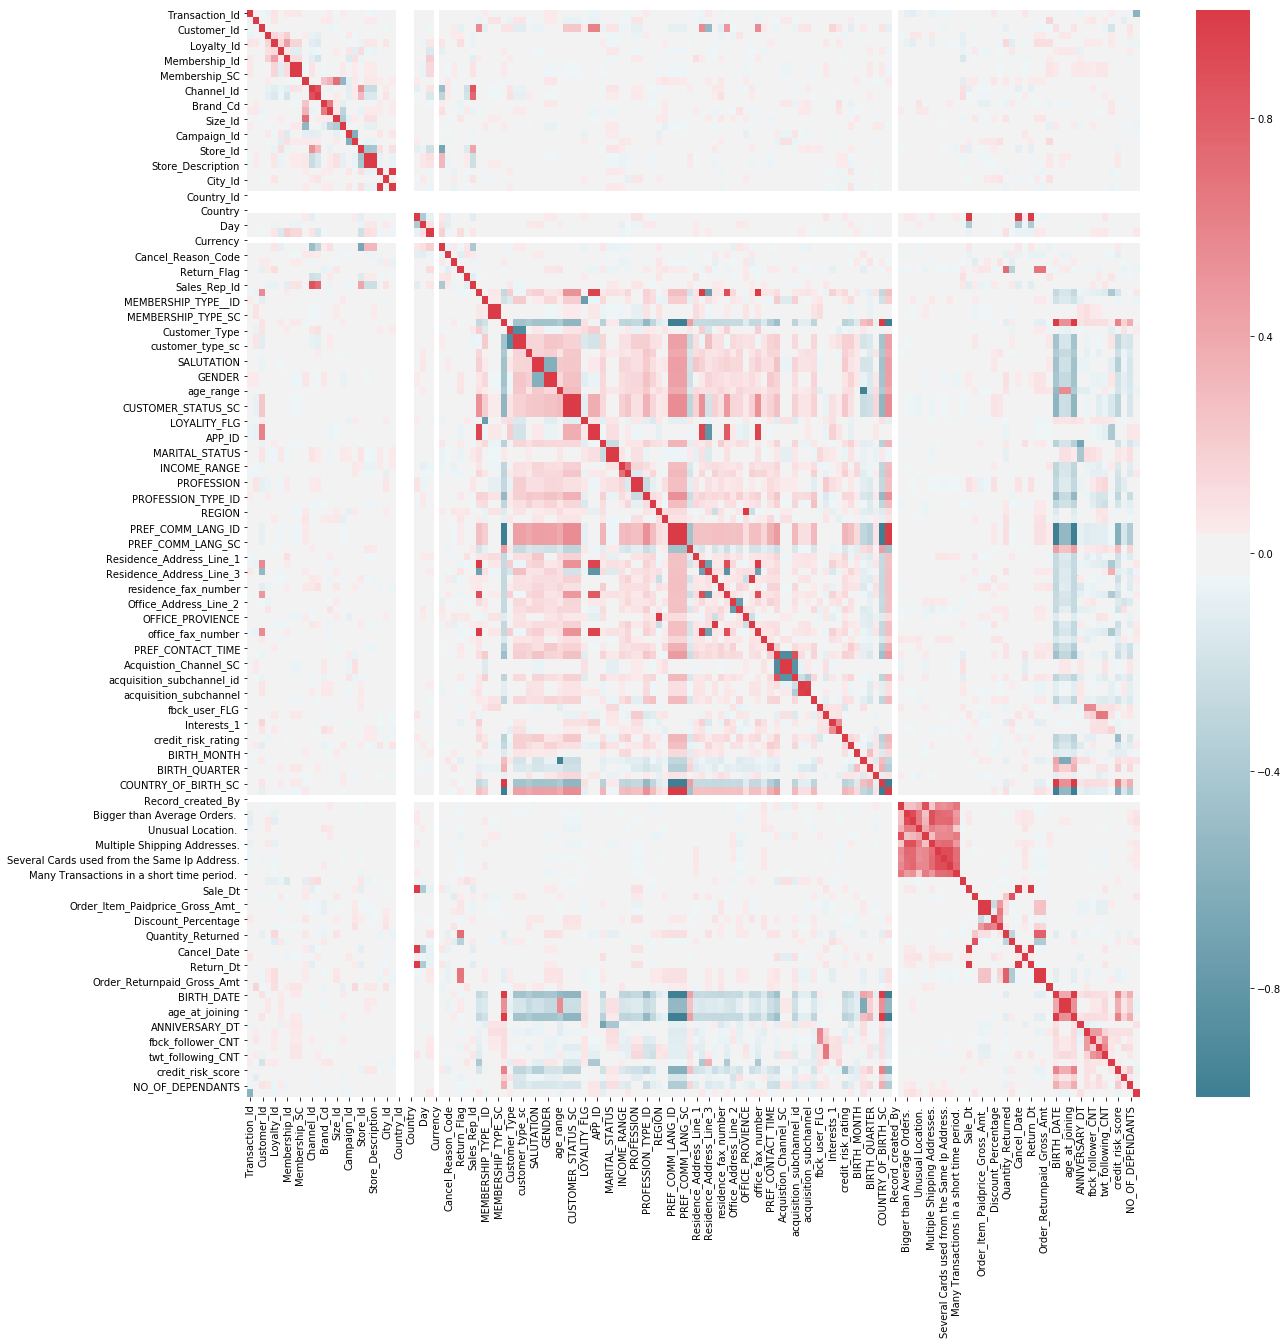

Would you like to increase the plot size for a clear view? - Y/Nn




In [33]:
    
fig_size_x = 20
fig_size_y = 20

while(True):
        print("Plotting correlation between the features...")
        print('\n')
        
        halfHeatMap_corr(data,figsize_x=fig_size_x, figsize_y=fig_size_y)

        fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
        print('\n')

        if fig_size_change_ind =='Y':
            fig_size_x += 5
            fig_size_y += 5
        else:
            break

#input("Press enter to continue...")

In [34]:
data,target,target_is_separate_ind                     = separate_target(data,target_name)
drop_corr_ind=(input('Would you like to drop any of the highly correlated features? - Y/N')).upper()
print('\n')
if drop_corr_ind == 'Y':
    corr_threshold_ind = (input("Would you like to specify a threshold of your choice-Y/N?..If not, default threshold value of 0.95 will be assumed.For every pair of correlated features,one of the correlated features above the threshold level will be dropped.")).upper()
    print('\n')
    if corr_threshold_ind == 'Y':
        corr_threshold = float((input("Please refer to the correlation plot and specify a threshold of your choice.")))
        if (corr_threshold > 1 and corr_threshold < 0):
            corr_threshold = 0.95   
    else:
        corr_threshold = 0.95
    print('\n')
    
    corr_matrix = data.corr().abs()
    c1 = corr_matrix.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[(c1.values!=1) & (c1.values > corr_threshold)]#
    print("Below is the pair of highly correlated features excluding the target feature, whose correlation coefficient is greater than threshold:\n ",high_cor)
    print('\n')
    to_drop=[high_cor.index[i][0] for i in range(len(high_cor))]
    to_drop=list(set(to_drop))
    print("Here is the list of features that will be dropped..: ",to_drop)
    print('\n')
    
    donot_drop_ind=(input("Is there any feature in the list that you would want to retain? - Y/N")).upper()
    donot_drop = []
    if donot_drop_ind =='Y':
        print("Enter the features that you would like to reatin seaparated by commas : ")
        donot_drop=[x for x in input().split(',')]
        
    if donot_drop:
        for i in donot_drop:
            to_drop.remove(i)
            
    data.drop(to_drop,axis =1,inplace=True)
    if to_drop:
        print("List of features dropped is :", to_drop)
    else:
        print("None of the features were dropped")
        
print('\n')  
input("Press enter to continue...")
        

Would you like to drop any of the highly correlated features? - Y/Ny


Would you like to specify a threshold of your choice-Y/N?..If not, default threshold value of 0.95 will be assumed.For every pair of correlated features,one of the correlated features above the threshold level will be dropped.y


Please refer to the correlation plot and specify a threshold of your choice.0.85


Below is the pair of highly correlated features excluding the target feature, whose correlation coefficient is greater than threshold:
  CUSTOMER_CREATED_DT                               COUNTRY_OF_BIRTH_SC                                 0.999994
office_fax_number                                 Residence_Address_Line_2                            0.999896
age_at_joining                                    AGE                                                 0.996965
REGION                                            OFFICE_PROVIENCE                                    0.995025
Return_Amt                         

''

In [35]:
#Function tio obtain a threshold value for outlier removal
def get_outlier_threshold(df):
        
    Q1=df.quantile(0.25)#1st qaurtile 
    Q3=df.quantile(0.75)#3rd qaurtile
    
    IQR=Q3-Q1#Inter quartile range
    #print(Q3+1.5*IQR)
    
    #upper_threshold  = (Q3+1.5*IQR).mean()
    #lower_threshold  = (Q1-1.5*IQR).mean()
    upper_whisker = df[df<=Q3+1.5*IQR].max()
    lower_whisker = df[df>=Q1-1.5*IQR].min()
    
    upper_threshold_median  = upper_whisker.median()
    upper_threshold_mean    = upper_whisker.mean()
    upper_threshold_mode    = upper_whisker.mode()[0]
    
    lower_threshold_median  = lower_whisker.median()
    lower_threshold_mean    = lower_whisker.mean()
    lower_threshold_mode    = lower_whisker.mode()[0]  
    return (upper_threshold_median,lower_threshold_median,upper_threshold_mean,lower_threshold_mean,upper_threshold_mode,lower_threshold_mode)#return thresholds as a tuple
 

In [36]:
#Function to visualize outliers in the data
def plotoutliers(df,figsize_x=fig_size_x,figsize_y=fig_size_y):
    
    plt.figure(figsize=(figsize_x, figsize_y))#specify the size of the figure
    ax=sns.boxplot(x="variable", y="value", data=pd.melt(df),showmeans=True)#plot outliers
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)#rotate the labels so as to adjust space
    
    threshold = get_outlier_threshold(df)#obtain upper and lower threshold values 
   
    ax.axhline(y=max(threshold[0],threshold[2],threshold[4]), color='r',linestyle='--',label='Upper threshold')#plot upper threshold
    ax.axhline(y=min(threshold[1],threshold[3],threshold[5]), color='b',linestyle='--',label='Lower threshold')#plot lower threshold
    ax.legend(loc='upper right')#set legend

    plt.show()
    
    return threshold
    

In [37]:
#Function to drop rows which contain outliers
def remove_outliers(df,column,threshold,method):
    #Default method is to filter outliers on the basis of interquartile range as we need the data to be normally distributed to filter data based on standard deviation
    
    if method == 'IQR':

        Q1      = df[column].quantile(0.25)#1st qaurtile of the feature
        Q3      = df[column].quantile(0.75)#3rd quartile of the feature
        IQR     = Q3 - Q1#interquartile range

        df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]
    
    if method =='threshold':
        
        df = df[~((df[column] < min(threshold[1],threshold[3],threshold[5])) |(df[column] > max(threshold[0],threshold[2],threshold[4])))]#remove data which is more than upper threshold and lesser than lower threshold
        
    if method == 'std':
        
        mean = df[column].mean()#mean of the feature
        std  = df[column].std()#standard deviation of the feature
        
        df = df[df[column] < (3*std + mean)]
        
    return df


Would you like to check for outliers in the data? - Y/Ny
Plotting outliers for continuous features...




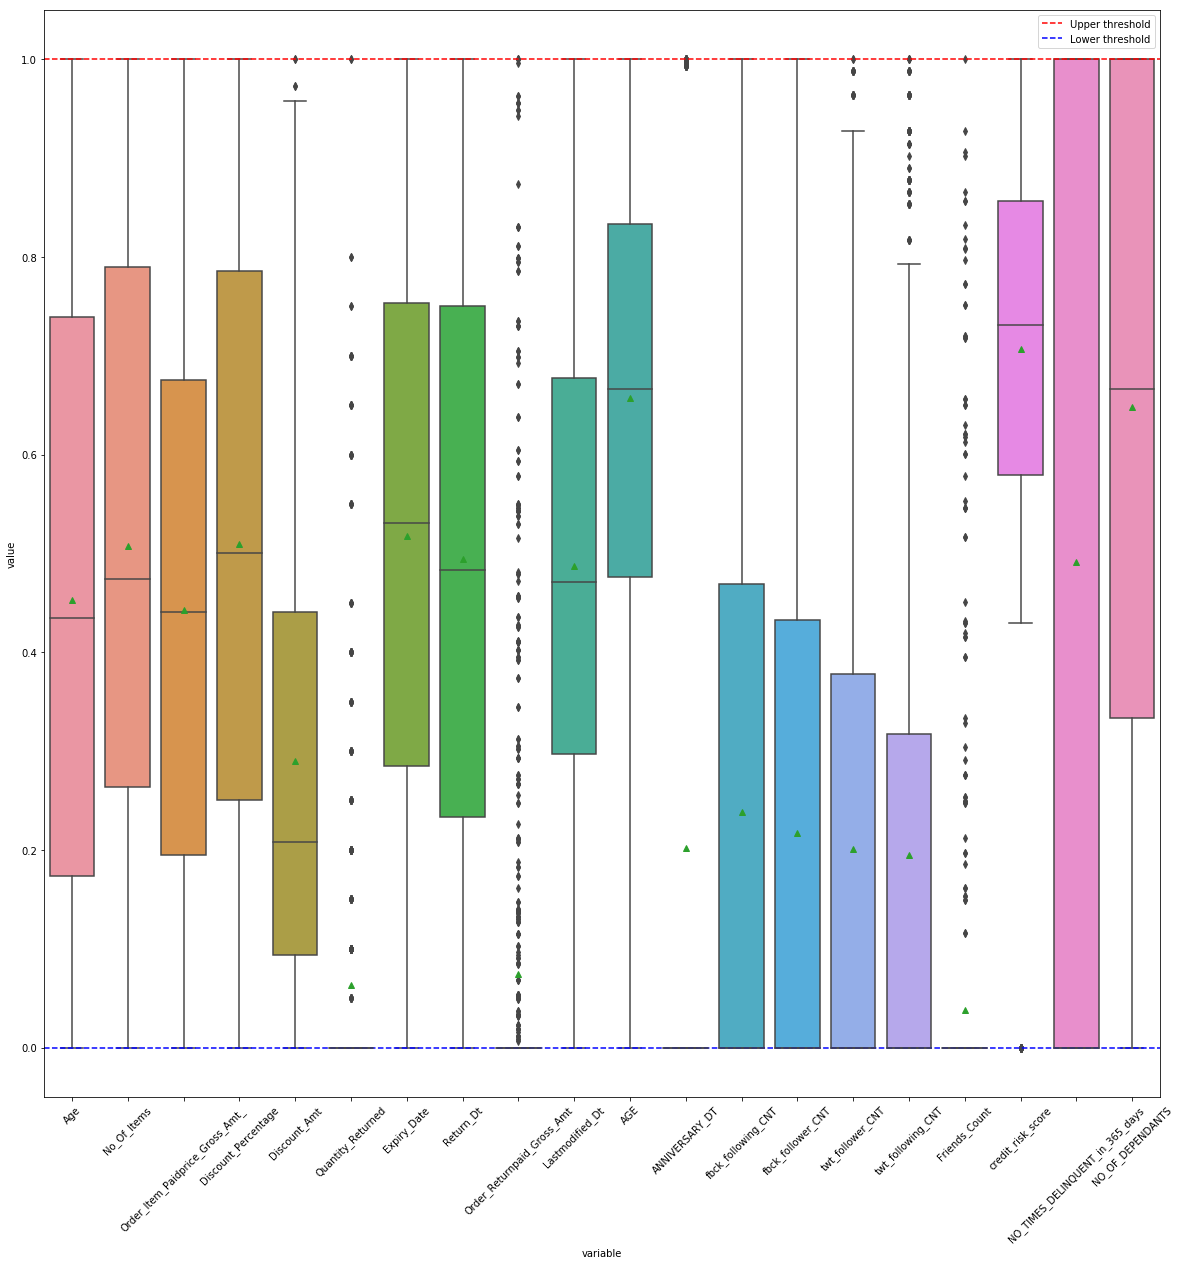

Would you like to increase the plot size for a clear view? - Y/Nn


Plotting outliers for categorical features...




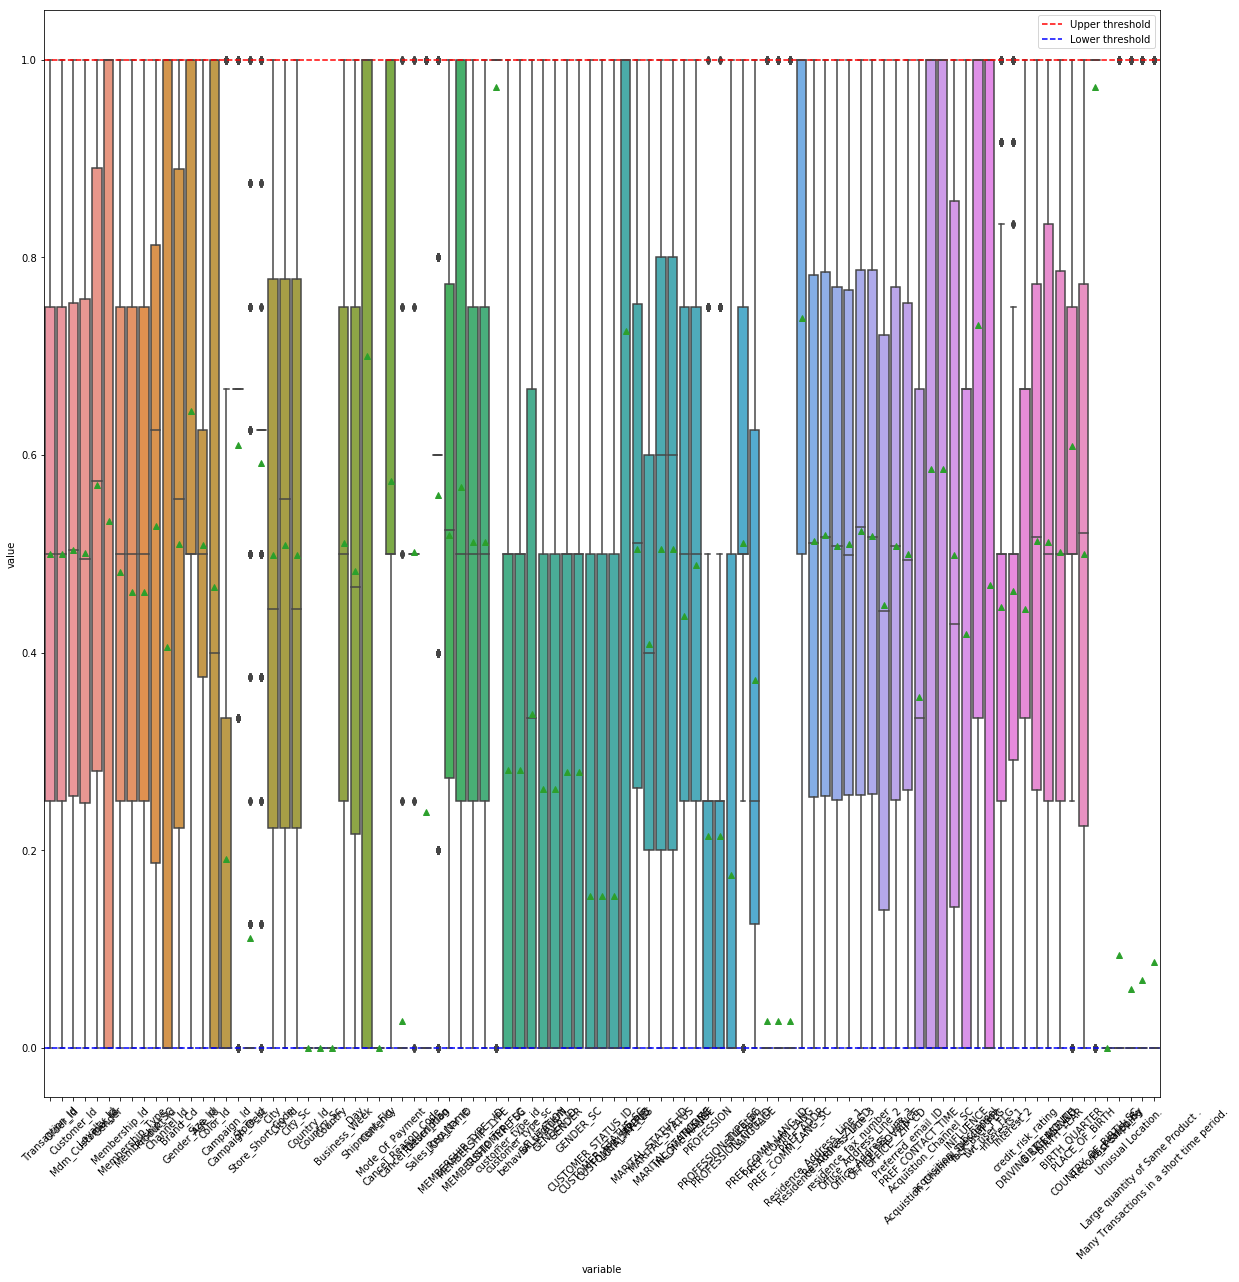

Would you like to increase the plot size for a clear view? - Y/Nn


Plotting outliers for all features...




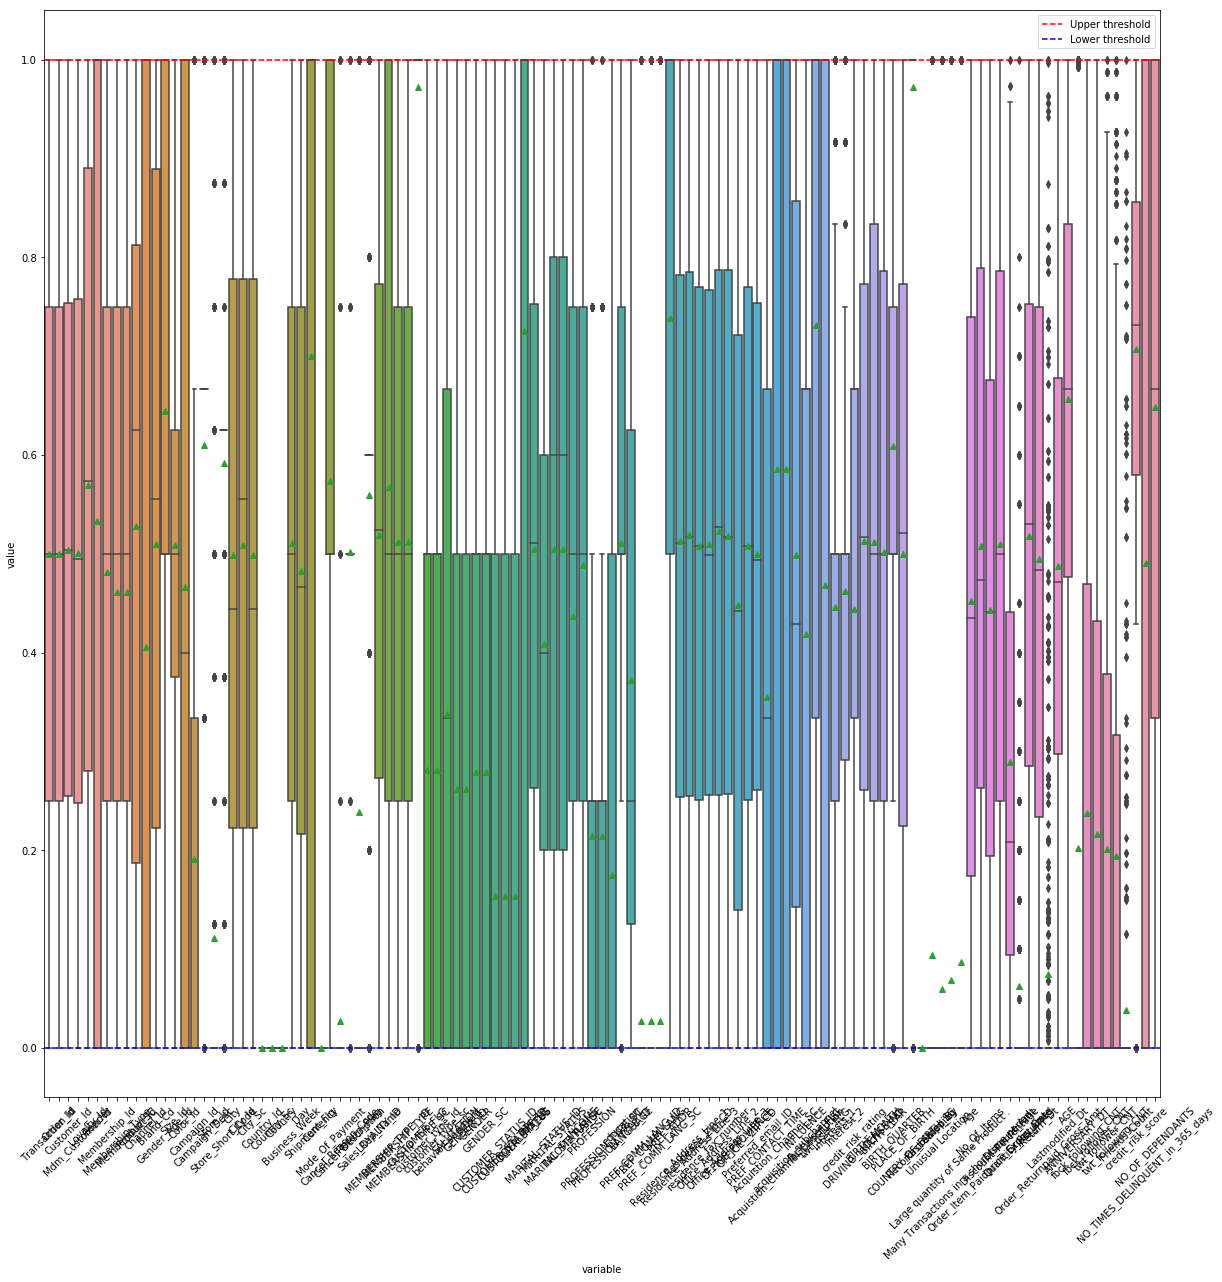

Would you like to increase the plot size for a clear view? - Y/Nn


Would you like to remove any of the outliers? - Y/Nn
Press enter to continue...


''

In [38]:

fig_size_x = 20
fig_size_y = 20

chck_outlier = True
#to_drop=[]
while(chck_outlier == True):
    
    check_outlier = (input('Would you like to check for outliers in the data? - Y/N')).upper()
    if check_outlier == 'Y':
        
        out_cont_features = [i for i in continuous_features  if i not in to_drop+ [target_name]]
        out_cat_features  = [i for i in categorical_features if i not in to_drop+ [target_name]]

        if out_cont_features:
            loop_cont = True
            while(loop_cont==True):
                print("Plotting outliers for continuous features...")
                print('\n')

                #threshold = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)
                threshold_cont = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)

                fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
                print('\n')

                if fig_size_change_ind =='Y':
                    fig_size_x += 5
                    fig_size_y += 5  
                else:
                    loop_cont = False

        if out_cat_features:
            loop_cat = True
            while(loop_cat == True):
                print("Plotting outliers for categorical features...")
                print('\n')

                #threshold = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)
                threshold_cat = plotoutliers(data[out_cat_features],fig_size_x,fig_size_y)

                fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
                print('\n')

                if fig_size_change_ind =='Y':
                    fig_size_x += 5
                    fig_size_y += 5  
                else:
                    loop_cat = False

        loop_all = True  
        while(loop_all == True):
            print("Plotting outliers for all features...")
            print('\n')
            if not target_is_separate_ind:
                data,target,target_is_separate_ind                     = separate_target(data,target_name)
            threshold_all = plotoutliers(data,fig_size_x,fig_size_y)

            fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
            print('\n')

            if fig_size_change_ind =='Y':
                fig_size_x += 5
                fig_size_y += 5
            else:
                loop_all = False

        outlier_remove_ind =  (input("Would you like to remove any of the outliers? - Y/N")).upper()
        if outlier_remove_ind == 'Y':
            if target_is_separate_ind:
                data,target_is_separate_ind       = concatenate_target(data,target)
            invalid_col=True
            while(invalid_col==True):
                col_for_outlier = input("Please enter the feature based on which you would like to remove outliers :")
                print("\n")
                invalid_col_name = validate_columns(data,columnlist = [col_for_outlier])
                if invalid_col_name:
                    print('Warning!! Please verify the feature name and re-enter : ',invalid_col_name)
                    print('\n')
                else:
                    invalid_col=False
            print("Please specify whether you would remove outliers based on Inter quartile range, threshold value or standard deviation")
            removal_method = input("Enter any of these : IQR / threshold / std\n")
            print("\n")
            outlier_thrshld = threshold_all
            if removal_method == 'threshold':
                print("Outliers will be removed based on the displayed threshold of all features unless you would want to change")
                threshld_cat_cont_ind = (input('Would you like to set the threshold based on only continuous or categorical features? - Y/N')).upper()
                if threshld_cat_cont_ind == 'Y':
                    cat_or_cont = (input('Enter A/B for threshold based on continuous/categorical features respectively')).upper()
                    if cat_or_cont == 'A':
                        outlier_thrshld = threshold_cont       
                    elif cat_or_cont =='B':
                        outlier_thrshld = threshold_cat
                else:
                    outlier_threshold_ind = input("Would you like to specify the threshold values for outlier removal? - Y/N")
                    print("\n")
                    if outlier_threshold_ind == 'Y':
                        lower_threshold = input("Enter the lower threshold :")
                        upper_threshold = input("Enter the upper threshold :")
                        print("\n")
                        outlier_thrshld = (lower_threshold,upper_threshold)

            data = remove_outliers(data,column = col_for_outlier,threshold = outlier_thrshld,method = removal_method)
            print("Outliers are successfully removed..")
            print("\n")
        else:
             chck_outlier = False
    else:
         chck_outlier = False
        

    
input("Press enter to continue...")

In [39]:
#Function to plot and obtain feature importance
def feature_imp_plot(df,target,classification,figsize_x=10,figsize_y=25):
    
    #Use random forest with 100 estimators to decide important features
    if classification:
        rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 42)
    else:
        rnd_clf = RandomForestRegressor (n_estimators = 100,random_state = 42)
    
    rnd_clf.fit(df,target)#fit the model
    
    #obtain feature importance along with columns
    x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, df.columns), reverse = False)))
    #x=[((i-min(x))/(max(x)-min(x)))for i in x]#scale the importances between 0 and 1 for better visualization
    #x=[format(i,'.10f') for i in x]
    fi_df=pd.DataFrame(x,index=y,columns=['Importance'])#create dataframe of feature importance
    
    #plot feature importance
    plt.figure(figsize=(figsize_x, figsize_y))
    ax=plt.barh(np.arange(len(y)), x, align='center', alpha=0.5,color='g',log=True)
    ax=plt.yticks(np.arange(len(y)), y)
    ax=plt.xlabel('Importance')
    
    #for p in ax.patches:
        #plt.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    

    
    return fi_df


Plotting feature importance in log scale of importances...


Please specify if this is a regression problem or classification

Enter R for Regression or C for Classification : c


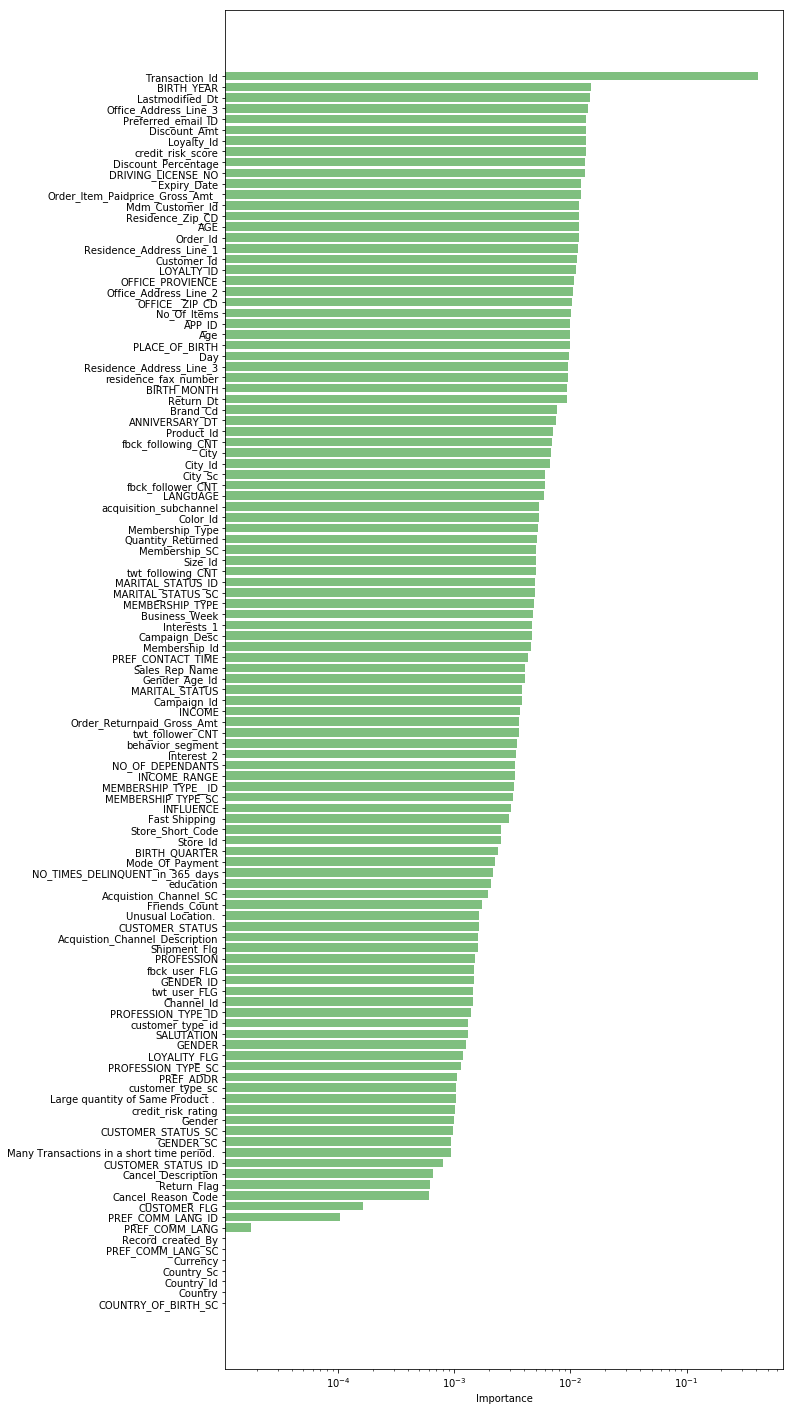

Below is the feature importance for every feature:
                                             Importance
Transaction_Id                                0.413235
BIRTH_YEAR                                    0.015132
Lastmodified_Dt                               0.014844
Office_Address_Line_3                         0.014185
Preferred_email_ID                            0.013672
Discount_Amt                                  0.013602
Loyalty_Id                                    0.013564
credit_risk_score                             0.013509
Discount_Percentage                           0.013423
DRIVING_LICENSE_NO                            0.013224
Expiry_Date                                   0.012332
Order_Item_Paidprice_Gross_Amt_               0.012209
Mdm_Customer_Id                               0.011914
Residence_Zip_CD                              0.011841
AGE                                           0.011741
Order_Id                                      0.011737
Residence_Add

In [40]:
print("Plotting feature importance in log scale of importances...")
print('\n')

print("Please specify if this is a regression problem or classification\n")
reg_or_class = (input("Enter R for Regression or C for Classification : ")).upper()

if reg_or_class == 'C':
    class_ind = True
else:
    class_ind = False

if not target_is_separate_ind:
    data,target,target_is_separate_ind                     = separate_target(data,target_name)

data_fi = feature_imp_plot(data,target=target,classification=class_ind)
plt.show()

print("Below is the feature importance for every feature:\n",data_fi.sort_values('Importance', ascending= False))


In [41]:
#Function to obtain the list of unimportant features by referring to feature importance plot and thereby setting threshold
def get_unimp_features(df,threshold):
    
    unimp_features_list = df[(df['Importance'].astype('float') < threshold)].index.values.tolist()
    
    return unimp_features_list
    

In [42]:
drop_features_ind = (input('Would you like to drop unimportant features? - Y/N')).upper()
print('\n')
if drop_features_ind == 'Y':
    fi_threshold = float(input('Please refer to the feature importance plot above and enter the threshold below which you would like to drop the features'))
    print('\n')
    unimp_features = get_unimp_features(data_fi,fi_threshold)
    print('Here is the list of unimportant features : ',unimp_features)
    print('\n')
    print('Dropping  all unimportant features ...')
    print('\n')
    data.drop(unimp_features,axis =1,inplace=True)
    print('Now let us take a look at our dataset with important features only!!\n ')
    display(data.head())
    

Would you like to drop unimportant features? - Y/Ny


Please refer to the feature importance plot above and enter the threshold below which you would like to drop the features0.000018


Here is the list of unimportant features :  ['COUNTRY_OF_BIRTH_SC', 'Country', 'Country_Id', 'Country_Sc', 'Currency', 'PREF_COMM_LANG_SC', 'Record_created_By', 'PREF_COMM_LANG']


Dropping  all unimportant features ...


Now let us take a look at our dataset with important features only!!
 


,Transaction_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Loyalty_Id,Gender,Membership_Id,Membership_Type,Membership_SC,Product_Id,...,AGE,ANNIVERSARY_DT,fbck_following_CNT,fbck_follower_CNT,twt_follower_CNT,twt_following_CNT,Friends_Count,credit_risk_score,NO_TIMES_DELINQUENT_in_365_days,NO_OF_DEPENDANTS
0,0.202960,0.494715,0.228995,0.464646,0.195122,0.0,0.75,0.75,0.75,0.0000,...,0.809524,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000
1,0.668076,0.692389,0.228995,0.737374,1.000000,0.0,1.00,0.50,0.50,0.4375,...,0.809524,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000
2,0.486258,0.527484,0.228995,0.979798,1.000000,1.0,1.00,0.50,0.50,0.5625,...,0.809524,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000
3,0.034884,0.364693,0.456343,0.666667,1.000000,1.0,1.00,0.50,0.50,0.7500,...,0.809524,0.0,0.049383,0.000000,0.000000,0.000000,0.419072,0.489270,0.0,0.333333
4,0.200846,0.284355,0.233937,0.434343,0.000000,1.0,0.75,0.75,0.75,1.0000,...,0.761905,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.483548,1.0,1.000000


In [43]:
##Function to reduce the number of features in the data
def dimreduction(df,reqd_dim):
    
    components_required=min(reqd_dim,len(df.columns)) #if number of features < 30, then reduce dimension to to number of features else to 30
    pca = PCA(n_components = components_required)
    principalComponents = pca.fit_transform(df.iloc[:,:].values)#converting data to array so as to fit
    principalDf = pd.DataFrame(data = principalComponents,index=df.index)#convert compressed data to dataframe
    
    return principalDf

In [44]:
dim_red_ind = (input('Would you like to reduce dimensions of the data? - Y/N')).upper()
if dim_red_ind == 'Y':
    no_of_comp = int(input('Please enter the number of dimensions that you would like to reduce to :'))
    data = dimreduction(data,reqd_dim = no_of_comp)
    print('Here is your compressed data..\n')
    display(data.head())

Would you like to reduce dimensions of the data? - Y/Nn


In [45]:
data,target_is_separate_ind       = concatenate_target(data,target)

In [46]:
data.head()

,Transaction_Id,Order_Id,Customer_Id,Mdm_Customer_Id,Loyalty_Id,Gender,Membership_Id,Membership_Type,Membership_SC,Product_Id,...,ANNIVERSARY_DT,fbck_following_CNT,fbck_follower_CNT,twt_follower_CNT,twt_following_CNT,Friends_Count,credit_risk_score,NO_TIMES_DELINQUENT_in_365_days,NO_OF_DEPENDANTS,Fraud
0,0.202960,0.494715,0.228995,0.464646,0.195122,0.0,0.75,0.75,0.75,0.0000,...,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000,0
1,0.668076,0.692389,0.228995,0.737374,1.000000,0.0,1.00,0.50,0.50,0.4375,...,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000,0
2,0.486258,0.527484,0.228995,0.979798,1.000000,1.0,1.00,0.50,0.50,0.5625,...,0.0,0.259259,0.876543,0.256098,0.865854,0.000000,0.991416,1.0,1.000000,0
3,0.034884,0.364693,0.456343,0.666667,1.000000,1.0,1.00,0.50,0.50,0.7500,...,0.0,0.049383,0.000000,0.000000,0.000000,0.419072,0.489270,0.0,0.333333,1
4,0.200846,0.284355,0.233937,0.434343,0.000000,1.0,0.75,0.75,0.75,1.0000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.483548,1.0,1.000000,0
